<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2019-08-25 23:59:59</font></h2>
<h3 align="center"><font size="5"> Total marks: 7.0</font></h3>

### Your information:
- Fullname: LÊ VĂN ĐIỆP
- Date of birth: 04/04/1990
- Place of birth: An Giang
- Email: levandiep44@gmail.com
- Mobile phone: 0989754363

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
# code here
df_train = pd.read_csv("loan_train.csv")
df_train.shape


(346, 10)

In [3]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()

In [4]:
# shape
df_train.shape

(346, 10)

In [5]:
# info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


In [6]:
df_train.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

## Không có giá trị null

In [7]:
# head()
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
# tail()
df_train.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [9]:
# describe()
df_train.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


# 1.Identify Variables


1. Input: Principal, terms, effective_date, due_date, age, education, Gender
2. Output: loan_status

#### Unnamed: 0, Unnamed: 0.1 là cột đánh số thứ tự, không phải là biến

3. Type of variable:

    3.1 Predictor: khác loan_status
    
    3.2 Target: loan_status
    
4.Data Type:

    4.1 Charactor/string: loan_status, effective_date, due_date, education, Gender
    
    4.2 Numberic: Principal,terms, age
    
5. Variable Category

 - loan_status, education, Gender

In [10]:
df_train = df_train.drop(columns =["Unnamed: 0", "Unnamed: 0.1"], axis=1)
df_train.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

In [11]:
#Data type Numberic
numbers = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numbers

['Principal', 'terms', 'age']

In [12]:
#Data type la object
objects = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
objects

['loan_status', 'effective_date', 'due_date', 'education', 'Gender']

In [13]:
#Categorical
i = 1
for obj in objects:
    print(i, "/", obj, "\t", len(df_train[obj].unique()), ":", df_train[obj].unique())
    i = i + 1

1 / loan_status 	 2 : ['PAIDOFF' 'COLLECTION']
2 / effective_date 	 7 : ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
3 / due_date 	 23 : ['10/7/2016' '9/22/2016' '10/8/2016' '9/24/2016' '9/16/2016' '10/9/2016'
 '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016' '9/26/2016'
 '10/11/2016' '11/10/2016' '9/18/2016' '10/26/2016' '9/19/2016'
 '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/2016'
 '9/23/2016']
4 / education 	 4 : ['High School or Below' 'Bechalor' 'college' 'Master or Above']
5 / Gender 	 2 : ['male' 'female']


In [14]:
#effective_date, due_date là kiểu Datetime cần convert dữ liệu string => Date time


# Univariate Analysis


In [15]:
features = ['Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']
i = 1
for obj in features:
    print(1, '/', obj, "\t", len(df_train[obj].unique()), ":", df_train[obj].unique() if len(df_train[obj].unique()) else "")
    i = i + 1

1 / Principal 	 5 : [1000  800  300  900  500]
1 / terms 	 3 : [30 15  7]
1 / effective_date 	 7 : ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
1 / due_date 	 23 : ['10/7/2016' '9/22/2016' '10/8/2016' '9/24/2016' '9/16/2016' '10/9/2016'
 '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016' '9/26/2016'
 '10/11/2016' '11/10/2016' '9/18/2016' '10/26/2016' '9/19/2016'
 '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/2016'
 '9/23/2016']
1 / age 	 32 : [45 33 27 28 29 36 26 39 40 32 25 34 31 37 21 30 24 35 22 50 44 43 46 38
 23 20 47 42 19 51 41 18]
1 / education 	 4 : ['High School or Below' 'Bechalor' 'college' 'Master or Above']
1 / Gender 	 2 : ['male' 'female']


In [16]:
# Continuous variable
# age

In [17]:
df_train['age'].describe(include='all')

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [18]:
age_median = df_train.age.median()
age_median

30.0

In [19]:
age_mode = df_train.age.mode()
age_mode

0    26
dtype: int64

In [20]:
#measure of dispersion
age_range = df_train.age.ptp()
age_range

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


33

In [21]:
Q1_age = np.percentile(df_train.age, 25)
Q1_age

27.0

In [22]:
Q3_age = np.percentile(df_train.age,75)
Q3_age

35.0

In [23]:
Age_iqr = scipy.stats.iqr(df_train.age)
Age_iqr

8.0

In [24]:
Age_var = df_train.age.var()
Age_var

36.47456647398844

In [25]:
Age_std = df_train.age.std()
Age_std

6.039417726402806

In [26]:
Age_skew = df_train.age.skew()
Age_skew

0.700410003463071

In [27]:
#0.7 > 0 hơi lệch phải

In [28]:
import seaborn as sns

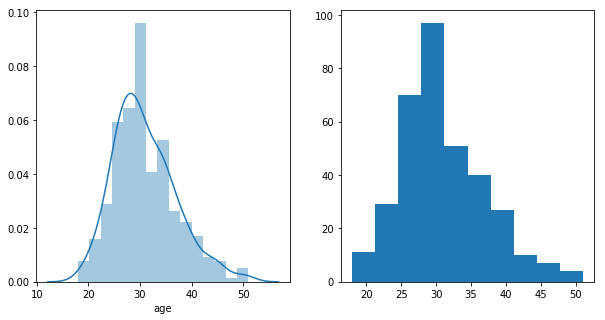

In [29]:
# visualization # histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_train.age)
plt.subplot(1,2,2)
plt.hist(df_train.age)
plt.show()

In [30]:
# Nhận xét thấy phân phối hơi lệch về bên phải, có outlier

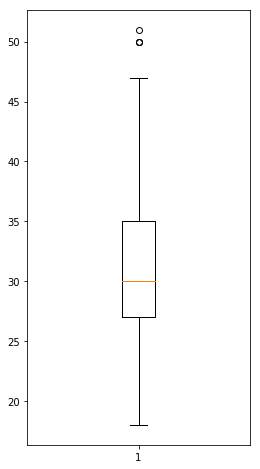

In [31]:
#boxplot
plt.figure(figsize=(4,8))
plt.boxplot(df_train.age)
plt.show()

In [32]:
#number of upper outliers
n_o_upper = df_train[df_train.age > (Q3_age + 1.5* Age_iqr)].shape[0]
n_o_upper

4

In [33]:
#number of lower outliers
n_o_lower = df_train[df_train.age < (Q1_age + 1.5*Age_iqr)].shape[0]
n_o_lower

307

In [34]:
# Principal

In [35]:
df_train['Principal'].describe(include='all')

count     346.000000
mean      943.641618
std       109.425530
min       300.000000
25%       900.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

In [36]:
Principal_median = df_train.Principal.median()
Principal_median

1000.0

In [37]:
Principal_mode = df_train.Principal.mode()
Principal_mode

0    1000
dtype: int64

In [38]:
#measure of dispersion
Principal_range = df_train.Principal.ptp()
Principal_range

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


700

In [39]:
Q1_Principal = np.percentile(df_train.Principal, 25)
Q1_Principal

900.0

In [40]:
Q3_Principal = np.percentile(df_train.Principal,75)
Q3_Principal

1000.0

In [41]:
Principal_iqr = scipy.stats.iqr(df_train.Principal)
Principal_iqr

100.0

In [42]:
Principal_var = df_train.Principal.var()
Principal_var

11973.946552735193

In [43]:
Principal_std = df_train.Principal.std()
Principal_std

109.42552971192414

In [44]:
Principal_skew = df_train.Principal.skew()
Principal_skew

-2.600235671644776

In [45]:
# Phân phối lệch về phái bên trái

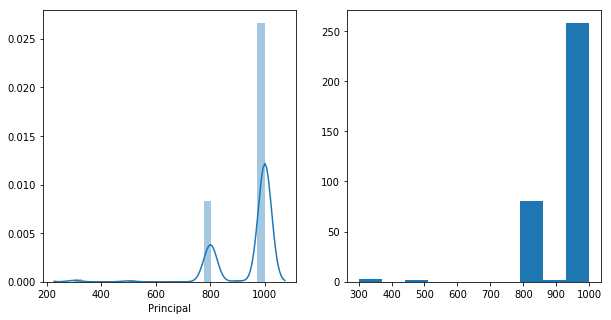

In [46]:
# visualization # histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_train.Principal)
plt.subplot(1,2,2)
plt.hist(df_train.Principal)
plt.show()

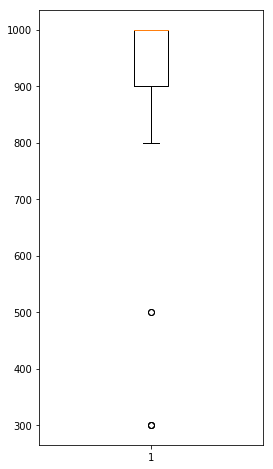

In [47]:
#boxplot
plt.figure(figsize=(4,8))
plt.boxplot(df_train.Principal)
plt.show()

# Bi-variate Analysis( Phân tích hai biến)
- Continuous and continuous

- Categorial and categorical

- Categorial and continuous


In [52]:
#Handle the Missing Values
#Handle Outlier Values

### Convert 'due_date', 'effective_date' to date time object 

In [54]:
from datetime import datetime

In [55]:
# code here
def convert_toDate(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y').date()


In [56]:
df_train['due_date'] = df_train['due_date'].apply(convert_toDate)


In [57]:
df_train['effective_date'] = df_train['effective_date'].apply(convert_toDate)

In [58]:
df_train.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male
345,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male


# Data visualization

How many sample of each class is in our data set?

In [ ]:
# code
num_paidoff = df_train.where(df_train['loan_status'] == 'PAIDOFF').count()
num_paidoff

**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [59]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [60]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

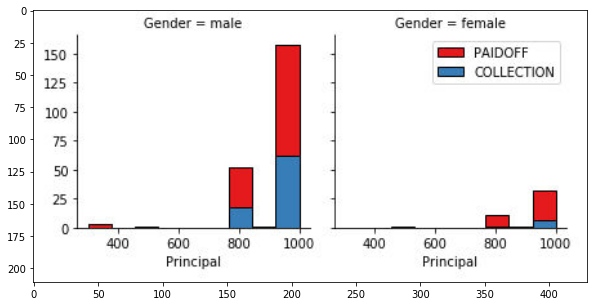

In [69]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

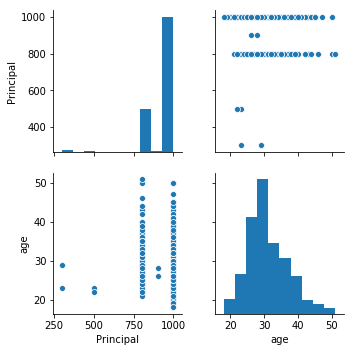

In [62]:
#continuous and continuous

sns.pairplot(df_train[['Principal', 'age']])

In [ ]:
#Không có tương quan tuyến tính

In [63]:
df_train[['Principal', 'age']].corr()

,Principal,age
Principal,1.000000,-0.060893
age,-0.060893,1.000000


In [64]:
# categorical & categorical
table_GenderEducation = pd.crosstab(df_train['Gender'], df_train['education'])
table_GenderEducation

education,Bechalor,High School or Below,Master or Above,college
Gender,,,,
female,10,20,0,22
male,34,131,2,127


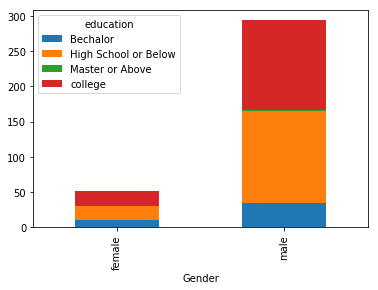

In [65]:
table_GenderEducation.plot(kind='bar', stacked=True)
plt.show()

In [67]:
# categorical & categorical
table_AgeGender = pd.crosstab(df_train['age'], df_train['Gender'])
table_AgeGender

Gender,female,male
age,,
18,0,1
19,1,1
20,0,3
21,0,5
22,0,7
23,2,6
24,2,12
25,1,15
26,5,24


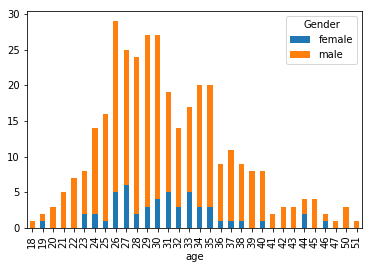

In [68]:
table_AgeGender.plot(kind='bar', stacked=True)


In [70]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

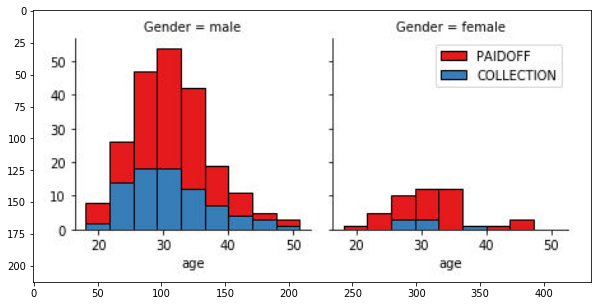

In [71]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

In [73]:
# code here


# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [74]:
# code here
#pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
#s.dt.dayofweek
df_train['dayofweek'] = df_train['effective_date']
df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2016-09-08
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2016-09-08
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,2016-09-08
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,2016-09-09
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,2016-09-09


In [75]:
def convert_toDayWeek(date_str):
    return date_str.strftime('%w')

In [76]:
df_train['dayofweek']=  df_train['dayofweek'].apply(convert_toDayWeek)
df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,4
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,4
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,4
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,5
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,5


Lets plot some columns to underestand data better:

In [77]:
img3 = np.array(Image.open('day_of_week.jpg'))

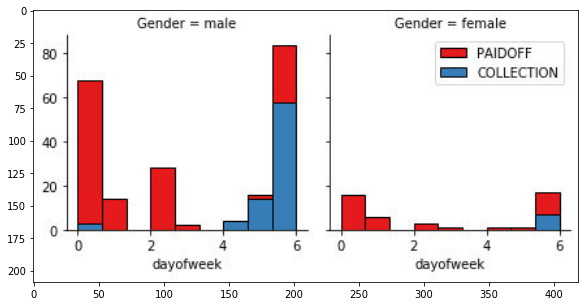

In [78]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

In [130]:
table_AgeGender2 = pd.crosstab(df_train['loan_status'], df_train['Gender'])
table_AgeGender2

Gender,female,male
loan_status,,
COLLECTION,7,79
PAIDOFF,45,215


In [112]:
df_train['dayofweek'].unique()


array(['4', '5', '6', '0', '1', '2', '3'], dtype=object)

In [124]:
data_male = df_train[df_train['Gender'] == 'male']
data_male.head(20)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,4
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,5
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,5
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,5
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,6
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,6
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,6
10,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,6
12,PAIDOFF,1000,7,2016-09-10,2016-09-16,27,High School or Below,male,6


In [131]:
df_male2 = data_male[df_train['loan_status'] == 'PAIDOFF']
df_male2

c:\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,4
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,5
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,5
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,5
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,6
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,6
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,6
10,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,6
12,PAIDOFF,1000,7,2016-09-10,2016-09-16,27,High School or Below,male,6


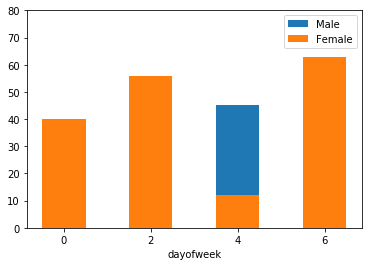

In [133]:
# code here
N = 4
df_male = (25,36,45,13)
df_female = (40,56,12,63)
width = 0.5

ind = np.arange(N)
pl1 = plt.bar(ind, df_male, width, label="Male")
plt2 = plt.bar(ind, df_female, width, label="Female")
plt.xlabel("dayofweek")
plt.xticks(ind,(0,2,4,6))
plt.yticks(np.arange(0,81,10))
plt.legend()
plt.show()

In [139]:
 df_train['dayofweek']

0      4
1      4
2      4
3      5
4      5
5      5
6      5
7      6
8      6
9      6
10     6
11     6
12     6
13     6
14     6
15     6
16     6
17     6
18     6
19     6
20     6
21     6
22     6
23     6
24     0
25     0
26     0
27     0
28     0
29     0
      ..
316    0
317    0
318    0
319    0
320    0
321    0
322    0
323    0
324    0
325    0
326    0
327    0
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    0
336    0
337    0
338    0
339    0
340    0
341    0
342    0
343    1
344    1
345    1
Name: dayofweek, Length: 346, dtype: object

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [143]:
# code here
df_train['weekend'] = df_train['dayofweek'].map(lambda x: 1 if x >= '3' else 0)
df_train.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,0,0
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,0,0
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,1,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,1,0
345,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male,1,0


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [156]:
# code here
loadn_gender_count = df_train[['loan_status','Gender']].groupby('Gender').count()
print(loadn_gender_count)

        loan_status
Gender             
female           52
male            294


**xxx** % of female pay there loans while only **xxx** % of males pay there loan

Lets convert male to 0 and female to 1:


In [157]:
# code here
df_train['Gender'] = df_train['Gender'].map(lambda x: 1 if x >= 'female' else 0)
df_train.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,1,0,0
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,1,0,0
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,1,1,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,1,1,0
345,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,1,1,0


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [158]:
# code here
loadn_education_count = df_train[['loan_status','education']].groupby('education').count()
print(loadn_education_count)

                      loan_status
education                        
Bechalor                       44
High School or Below          151
Master or Above                 2
college                       149


#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [160]:
# code here
df_train_tmp = df_train[[ 'Principal','terms','age','Gender','education']]
df_train_tmp.head()

,Principal,terms,age,Gender,education
0,1000,30,45,1,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,1,college
3,1000,30,28,1,college
4,1000,30,29,1,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [175]:
# code here
df_Feature = df_train[[ 'Principal','terms','age','Gender','education']]
df_Feature.tail()

,Principal,terms,age,Gender,education
341,800,15,32,1,High School or Below
342,1000,30,25,1,High School or Below
343,800,15,39,1,college
344,1000,30,28,1,college
345,1000,30,26,1,college


In [176]:
df_Feature_Onehost = pd.get_dummies(df_Feature, columns=['education'], prefix ='e')
df_Feature_Onehost.head()

,Principal,terms,age,Gender,e_Bechalor,e_High School or Below,e_Master or Above,e_college
0,1000,30,45,1,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,1,0,0,0,1


In [177]:
df_Feature_Onehost = df_Feature_Onehost.drop(columns =['e_Master or Above'])
df_Feature_Onehost.tail()

,Principal,terms,age,Gender,e_Bechalor,e_High School or Below,e_college
341,800,15,32,1,0,1,0
342,1000,30,25,1,0,1,0
343,800,15,39,1,0,0,1
344,1000,30,28,1,0,0,1
345,1000,30,26,1,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [180]:
# code here
X = df_Feature_Onehost

What are our lables?
- y is output, y = 'loan_status' column

In [181]:
# code here
Y = df_train['loan_status'].map(lambda x: 1 if x >= 'PAIDOFF' else 0)
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [ ]:
# code here

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [182]:
from sklearn.model_selection import train_test_split   
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import column_or_1d

In [183]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [184]:
clf = LogisticRegression()

In [185]:
clf.fit(X_train, column_or_1d(Y_train))

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
clf.intercept_

array([0.42571463])

In [187]:
clf.coef_


array([[-4.64927285e-04, -2.84872304e-02,  3.48104350e-02,
         4.25714631e-01,  1.50992069e-01,  8.91267320e-02,
         4.89894749e-01]])

In [188]:
print('score Scikit learn: ', clf.score(X_test,Y_test))

score Scikit learn:  0.7714285714285715


In [189]:
Yhat_train = clf.predict(X_train)

In [190]:
Yhat_test = clf.predict(X_test)
Yhat_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [191]:
from sklearn.metrics import accuracy_score 
print("Train Accuracy is ", accuracy_score(Y_train,Yhat_train)*100,"%") 

Train Accuracy is  74.63768115942028 %


In [192]:
print("Test Accuracy is ", accuracy_score(Y_test,Yhat_test)*100,"%") 

Test Accuracy is  77.14285714285715 %


# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# and the others libraries...

### Load Test set for evaluation 

In [193]:
# Read CSV file: loan_test.csv
# code here
df_test = pd.read_csv("loan_test.csv")
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [198]:
df_Feature_Test = df_test[[ 'Principal','terms','age','Gender','education']]
df_Feature_Test.tail()

,Principal,terms,age,Gender,education
49,1000,30,32,male,High School or Below
50,800,15,29,male,college
51,1000,30,37,male,High School or Below
52,800,15,36,male,High School or Below
53,1000,30,33,male,High School or Below


In [200]:
# Categorical boolean mask
categorical_feature_mask = df_Feature_Test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_Feature_Test.columns[categorical_feature_mask].tolist()
categorical_cols

['Gender', 'education']

In [215]:
df_test_now = pd.get_dummies(data=df_Feature_Test, columns=categorical_cols, drop_first=True)
df_test_now.head()


,Principal,terms,age,Gender_male,education_High School or Below,education_Master or Above,education_college
0,1000,30,50,0,0,0,0
1,300,7,35,1,0,1,0
2,1000,30,43,0,1,0,0
3,1000,30,26,1,0,0,1
4,800,15,29,1,0,0,0


In [206]:
#df_test_now =df_test_now.drop(columns=['education_Master or Above'])



In [207]:
#df_test_now.tail()

,Principal,terms,age,Gender_male,education_High School or Below,education_college
49,1000,30,32,1,1,0
50,800,15,29,1,0,1
51,1000,30,37,1,1,0
52,800,15,36,1,1,0
53,1000,30,33,1,1,0


In [216]:
X_test_now = df_test_now
X_test_now.head()

,Principal,terms,age,Gender_male,education_High School or Below,education_Master or Above,education_college
0,1000,30,50,0,0,0,0
1,300,7,35,1,0,1,0
2,1000,30,43,0,1,0,0
3,1000,30,26,1,0,0,1
4,800,15,29,1,0,0,0


In [217]:
Yhat_test_now = clf.predict(X_test_now)

In [218]:
df_test_now['loan_status'] = Yhat_test_now

In [219]:
df_test_now.head()

,Principal,terms,age,Gender_male,education_High School or Below,education_Master or Above,education_college,loan_status
0,1000,30,50,0,0,0,0,1
1,300,7,35,1,0,1,0,1
2,1000,30,43,0,1,0,0,1
3,1000,30,26,1,0,0,1,1
4,800,15,29,1,0,0,0,1


In [222]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,1,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,1,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,1,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,1,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,1,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
# Model Evaluation

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | F1-score |
|--------------------|---------|----------|
| LogisticRegression | 0.75     | ?        |

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>